In this part, I am going to apply simple logistic regression for classification to get as an output (Win,Lost,Draw) as (1,0,0)

The discussion part is about the features that I am going to use! 
I am going to start with 3 features and I'll add more later

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
    
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
bundisliga_matchs = pd.read_csv('../data/Match_2014_2016_Second_Test.csv', index_col=0,encoding='latin-1')

In [3]:
bundisliga_matchs.head()

season  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                    
9645  2014/2015              9823              8721               2   
9646  2014/2015              9789              8178               0   
9647  2014/2015              9788             10269               1   
9648  2014/2015              8226              8406               2   
9649  2014/2015              9904             10189               2   

      away_team_goal  B365H  B365D  B365A   BWH   BWD  ...    LBA   PSH   PSD  \
id                                                     ...                      
9645               1   1.25   6.00  10.00  1.26  5.75  ...  10.00  1.28  6.47   
9646               2   1.57   4.33   5.00  1.62  4.00  ...   5.50  1.63  4.39   
9647               1   1.95   3.50   3.75  1.95  3.50  ...   3.80  1.94  3.73   
9648               0   1.91   3.60   3.80  1.95  3.50  ...   3.75  1.96  3.83   
9649               1   2.90   3.50   2.30  2.85  3.50  ...   2.30  3.15  3.58   

        PSA   WHH  WHD   WHA   VCH   VCD    VCA  
id                                               
9645  12.00  1.20  7.0  12.0  1.29  6.00  12.00  
9646   5.56  1.62  4.2   5.0  1.65  4.00   6.00  
9647   4.22  1.95  3.5   3.8  1.95  3.60   4.20  
9648   4.02  1.95  3.5   3.8  2.00  3.75   3.75  
9649   2.37  3.20  3.2   2.3  3.20  3.50   2.38  

[5 rows x 26 columns]

In [4]:
bundisliga_matchs.columns

Index(['season', 'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA'],
      dtype='object')

In [5]:
irrelevant_cols = ['BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA']
bundisliga_matchs.drop(irrelevant_cols, axis=1, inplace=True)
bundisliga_matchs

season  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                     
9645   2014/2015              9823              8721               2   
9646   2014/2015              9789              8178               0   
9647   2014/2015              9788             10269               1   
9648   2014/2015              8226              8406               2   
9649   2014/2015              9904             10189               2   
...          ...               ...               ...             ...   
10252  2015/2016              8406              8262               0   
10253  2015/2016              8697              9823               0   
10254  2015/2016              9810              9788               1   
10255  2015/2016              8722              9904               0   
10256  2015/2016              9905              9789               0   

       away_team_goal  B365H  B365D  B365A  
id                                          
9645                1   1.25   6.00  10.00  
9646                2   1.57   4.33   5.00  
9647                1   1.95   3.50   3.75  
9648                0   1.91   3.60   3.80  
9649                1   2.90   3.50   2.30  
...               ...    ...    ...    ...  
10252               2   1.80   3.50   4.75  
10253               1  17.00   7.00   1.18  
10254               5   2.45   3.40   2.88  
10255               1   1.95   3.50   4.00  
10256               2   5.75   4.75   1.50  

[612 rows x 8 columns]

In [6]:
def WinHomeTeam(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 1
    else:
        return 0

def LoseHomeTeam(row):
    if row['home_team_goal'] < row['away_team_goal']:
        return 1
    else:
        return 0
    
def DrawHomeTeam(row):
    if row['home_team_goal'] == row['away_team_goal']:
        return 1
    else:
        return 0

In [7]:
bundisliga_matchs['WinHomeTeam'] = bundisliga_matchs.apply(lambda row: WinHomeTeam(row), axis=1)
bundisliga_matchs['LoseHomeTeam'] = bundisliga_matchs.apply(lambda row: LoseHomeTeam(row), axis=1)
bundisliga_matchs['DrawHomeTeam'] = bundisliga_matchs.apply(lambda row: DrawHomeTeam(row), axis=1)

In [8]:
bundisliga_matchs.head()

season  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                    
9645  2014/2015              9823              8721               2   
9646  2014/2015              9789              8178               0   
9647  2014/2015              9788             10269               1   
9648  2014/2015              8226              8406               2   
9649  2014/2015              9904             10189               2   

      away_team_goal  B365H  B365D  B365A  WinHomeTeam  LoseHomeTeam  \
id                                                                     
9645               1   1.25   6.00  10.00            1             0   
9646               2   1.57   4.33   5.00            0             1   
9647               1   1.95   3.50   3.75            0             0   
9648               0   1.91   3.60   3.80            1             0   
9649               1   2.90   3.50   2.30            1             0   

      DrawHomeTeam  
id                  
9645             0  
9646             0  
9647             1  
9648             0  
9649             0

In [9]:
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
categorical_cols = ['season']
bundisliga_matchs.loc[:, categorical_cols] = bundisliga_matchs[categorical_cols].apply(lambda col: le.fit_transform(col))

bundisliga_matchs.head()

season  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                 
9645       0              9823              8721               2   
9646       0              9789              8178               0   
9647       0              9788             10269               1   
9648       0              8226              8406               2   
9649       0              9904             10189               2   

      away_team_goal  B365H  B365D  B365A  WinHomeTeam  LoseHomeTeam  \
id                                                                     
9645               1   1.25   6.00  10.00            1             0   
9646               2   1.57   4.33   5.00            0             1   
9647               1   1.95   3.50   3.75            0             0   
9648               0   1.91   3.60   3.80            1             0   
9649               1   2.90   3.50   2.30            1             0   

      DrawHomeTeam  
id                  
9645             0  
9646             0  
9647             1  
9648             0  
9649             0

In [10]:
yColumns = ['WinHomeTeam','LoseHomeTeam', 'DrawHomeTeam']
dfY = bundisliga_matchs[yColumns]
y = dfY.to_numpy()
y

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=int64)

In [11]:
xColumns = ['season', 'home_team_goal','away_team_goal', 'B365H', 'B365D', 'B365A']
dfX = bundisliga_matchs[xColumns]
X_matchs = dfX.to_numpy()
X_matchs

array([[ 0.  ,  2.  ,  1.  ,  1.25,  6.  , 10.  ],
       [ 0.  ,  0.  ,  2.  ,  1.57,  4.33,  5.  ],
       [ 0.  ,  1.  ,  1.  ,  1.95,  3.5 ,  3.75],
       ...,
       [ 1.  ,  1.  ,  5.  ,  2.45,  3.4 ,  2.88],
       [ 1.  ,  0.  ,  1.  ,  1.95,  3.5 ,  4.  ],
       [ 1.  ,  0.  ,  2.  ,  5.75,  4.75,  1.5 ]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
         X_matchs, y, test_size=0.3, random_state=0)

Now we define x and y. These placeholders will hold our iris data (both the features and label matrices), and help pass them along to different parts of the algorithm. You can consider placeholders as empty shells into which we insert our data. We also need to give them shapes which correspond to the shape of our data. Later, we will insert data into these placeholders by “feeding” the placeholders the data via a “feed_dict” (Feed Dictionary).

### Why use Placeholders?

    This feature of TensorFlow allows us to create an algorithm which accepts data and knows something about the shape of the data without knowing the amount of data going in.
    When we insert “batches” of data in training, we can easily adjust how many examples we train on in a single step without changing the entire algorithm

In [13]:
# numFeatures is the number of features in our input data.
# 6
numFeatures = X_train.shape[1]

# numLabels is the number of classes our data points can be in.
# In this test, this number is '3'.
numLabels = y_train.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # 6 features, so X is a tensor to hold our data.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.

### Set model weights and bias

we need a shared variable weight matrix for Logistic Regression. We initialize both W and b as tensors full of zeros. Since we are going to learn W and b, their initial value does not matter too much. These variables are the objects which define the structure of our regression model, and we can save them after they have been trained so we can reuse them later.

We define two TensorFlow variables as our parameters. These variables will hold the weights and biases of our logistic regression and they will be continually updated during training.

Notice that W has a shape of [6, 3] because we want to multiply the 6-dimensional input vectors by it to produce 3-dimensional vectors of evidence for the difference classes. b has a shape of [3] so we can add it to the output. Moreover, unlike our placeholders above which are essentially empty shells waiting to be fed data, TensorFlow variables need to be initialized with values, e.g. with zeros.

In [14]:
W = tf.Variable(tf.zeros([6, 3]))  # 6-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

In [15]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))

### Logistic Regression model

We now define our operations in order to properly run the Logistic Regression. Logistic regression is typically thought of as a single equation:

𝑦̂ =𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑊𝑋+𝑏)

However, for the sake of clarity, we can have it broken into its three main components:

    a weight times features matrix multiplication operation,
    a summation of the weighted features and a bias term,
    and finally the application of a sigmoid function.

As such, you will find these components defined as three separate operations below.

the function we are going to use is the <i>logistic function</i> $(\frac{1}{1+e^{-Wx}})$, which is fed the input data after applying weights and bias. In TensorFlow, this function is implemented as the <code>nn.sigmoid</code> function. Effectively, this fits the weighted input with bias into a 0-100 percent curve, which is the probability function we want.

In [16]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

### Training

The learning algorithm is how we search for the best weight vector (𝐰). This search is an optimization problem looking for the hypothesis that optimizes an error/cost measure.


What tell us our model is bad?
The Cost or Loss of the model, so what we want is to minimize that.

What is the cost function in our model?
The cost function we are going to utilize is the Squared Mean Error loss function.

How to minimize the cost function?
We can't use least-squares linear regression here, so we will use gradient descent instead. Specifically, we will use batch gradient descent which calculates the gradient from all data points in the data set.
Cost function
Before defining our cost function, we need to define how long we are going to train and how should we define the learning rate.


In [17]:
# Number of Epochs in our training
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=X_train.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [18]:
#Defining our cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

#Defining our Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

Now we move on to actually running our operations. We will start with the operations involved in the prediction phase (i.e. the logistic regression itself).

First, we need to initialize our weights and biases with zeros or random values via the inbuilt Initialization Op, <b>tf.initialize_all_variables()</b>. This Initialization Op will become a node in our computational graph, and when we put the graph into a session, then the Op will run and create the variables.

In [19]:
# Create a tensorflow session
sess = tf.Session()

# Initialize our weights and biases variables.
init_OP = tf.global_variables_initializer()

# Initialize all tensorflow variables
sess.run(init_OP)

We also want some additional operations to keep track of our model's efficiency over time. We can do this like so:

In [20]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

Now we can define and run the actual training loop, like this:

In [21]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: X_train, yGold: y_train})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: X_train, yGold: y_train})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: X_test, 
                                                                yGold: y_test})))

step 0, training accuracy 0.481308, cost 127.421, change in cost 127.421
step 10, training accuracy 0.658879, cost 103.672, change in cost 23.7489
step 20, training accuracy 0.707944, cost 92.858, change in cost 10.8145
step 30, training accuracy 0.733645, cost 85.8202, change in cost 7.03777
step 40, training accuracy 0.757009, cost 80.8281, change in cost 4.99206
step 50, training accuracy 0.787383, cost 77.0783, change in cost 3.74982
step 60, training accuracy 0.799065, cost 74.1345, change in cost 2.94377
step 70, training accuracy 0.801402, cost 71.7432, change in cost 2.39135
step 80, training accuracy 0.810748, cost 69.7479, change in cost 1.99527
step 90, training accuracy 0.810748, cost 68.0474, change in cost 1.70055
step 100, training accuracy 0.810748, cost 66.5729, change in cost 1.4745
step 110, training accuracy 0.810748, cost 65.2762, change in cost 1.29668
step 120, training accuracy 0.813084, cost 64.1224, change in cost 1.15384
step 130, training accuracy 0.815421, 

D:\ProgrammeFile\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\ProgrammeFile\Anaconda\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


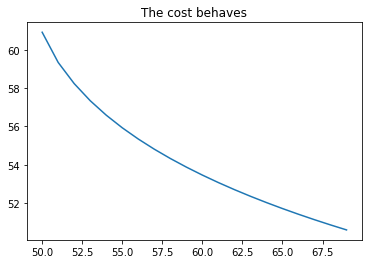

In [22]:
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.title("The cost behaves")
plt.show()

### To test logistic regression using sklearn 

https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125